# Working With Neuroimaging Data

## Neuroimaging Data File

The Neuroimaging Informatics Technology Initiative (NIfTI) is an open file format commonly used to store fMRI data.

A NIfTI file stores 2D, 3D or 4D data:
* 2D file stores data of a single slice.
* 3D file stores data of a single volume of multiple slices.
* 4D file stores data of multiple volumes of multiple slices, the 4th dimension is usually used to locate multiple volumes in time.

In a 2D image, each single element is a pixel referenced by two coordinates.<br>
In a 3D image, each single element is a voxel referenced by three coordinates. A voxel (volumetric pixel) is the 3D equivalent of a 2D pixel. It represents a value in three-dimensional space.

NIfTI image voxels are the smallest 3D units of a NIfTI file, representing 3D scalar values like MRI intensities.

fMRI data stored in NIfTI format consists of 4D arrays (3D space + 1D time) where each voxel contains an intensity value representing the Blood-Oxygen-Level-Dependent (BOLD) signal.

These intensity values are proportional to the amount of oxyhemoglobin and vary over time based on neuronal activity.

The fourth dimension in a NIfTI file represents time, enabling analysis of the intensity fluctuations for every voxel across the entire scan, often with 50–100+ timepoints.

## Components of a NIfTI File

NIfTI files use the **.nii** extension. For gzip compressed files, the **.nii.gz** extension is commonly used.

The following figure illustrates the components of a NIfTI file and the reference space RAS (Right - Anterior - Superior):

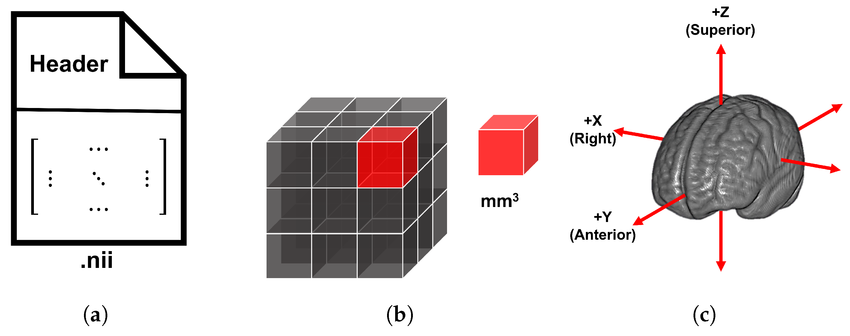

Components of a NIfTI file:

* (a) A simplified illustration of the NIfTi file format (the file extension is `.nii`), which stores both metadata (in the header) and image data (voxel intensities). The image data is stored as a matrix within the file.

* (b) A visualization of the 3D image matrix composed of voxels—small cubes that represent the spatial resolution of the scan, measured in mm³. The small red cube represents a voxel within the shown gray matrix.

* (c) The RAS coordinate system of the scans, where the x-, y-, and z-axes, illustrated by red arrows, correspond to the Right–Left, Anterior–Posterior, and Superior–Inferior directions, respectively.

## NiBabel Library

NiBabel is a Python library for reading, writing and manipulating neuroimaging files.

It allows access to image metadata (headers) and image data through NumPy arrays, facilitating numerical operations and analysis.

We install NiBabel library:

In [ ]:
!pip install -q nibabel

## Download NIfTI Image File

In the following, we will work with a 3D data file.

In [ ]:
!wget https://raw.githubusercontent.com/nipraxis/nipraxis-data/0.5/ds114_sub009_highres.nii

--2026-01-28 15:37:20--  https://raw.githubusercontent.com/nipraxis/nipraxis-data/0.5/ds114_sub009_highres.nii
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 40894816 (39M) [application/octet-stream]
Saving to: ‘ds114_sub009_highres.nii’

ds114_sub009_highre 100%[===================>]  39.00M  --.-KB/s    in 0.1s    

2026-01-28 15:37:21 (300 MB/s) - ‘ds114_sub009_highres.nii’ saved [40894816/40894816]



## Imports

In [ ]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

# Set numpy to print only 2 decimal digits
np.set_printoptions(precision=2, suppress=True)

# Set 'gray' as the default colormap in  matplotlib
plt.rcParams['image.cmap'] = 'gray'

## Reading NIfTI Image File

We use the Nibabel **`load()`** function to create a NiBabel image object from a NIfTI file.

We load an example T1w image from the file named `ds114_sub009_highres.nii` we just downloaded.

In [ ]:
# create a NiBabel image object from a NIfTI file
img = nib.load('ds114_sub009_highres.nii', mmap=False)

print(type(img))

# print the image shape
print(img.shape)

<class 'nibabel.nifti1.Nifti1Image'>
(256, 156, 256)


A NiBabel NIfTI image object encodes all the information in the file and store it as attributes.

In the following, we will go through the three main attributes that are:

* **`header`** : contains metadata about the image, such as image dimensions, data type, etc.
* **`data`** : contains the image data itself as a numpy arrary.
* **`affine`** : tells the position of the image array data in a reference space.



## The Header

The **`header`** attribute of the NiBabel image object contains the metadata about the NIfTI image.

In [ ]:
# access the header of the image object
print(img.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : np.bytes_(b'')
db_name         : np.bytes_(b'')
extents         : 0
session_error   : 0
regular         : np.bytes_(b'r')
dim_info        : 0
dim             : [  3 256 156 256   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1.   1.   1.3  1.   0.01 0.   0.   0.  ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : np.bytes_(b'FSL5.0')
aux_file        : np.bytes_(b'')
qform_code      : scanner
sform_code      : scanner
quatern_b       : -0.11747453
quatern_c       : 0.008146102
quatern_d       : 0.022481605
qoffset_x       : 

The **`header`** attribute is a dictionary, so we access each value using its associated key.

For example, the value associated with the key **`dim`** is a list containing information about the dimensions of the image array.<br>
The first element of this list refers to the number of dimensions.<br>
The 2nd, 3rd and 4th elements refer to the size of each dimensions in the voxel space (x, y, z).

In [ ]:
# access the value associated with the key 'dim'
print(img.header['dim'])

[  3 256 156 256   1   1   1   1]


## The Data

We use the **`get_fdata()`** method to access the image data.

This method returns the image data as a **`numpy.memmap`**, which is a subclass of **`numpy.ndarray`** that provides memory-mapping.

To set the **`get_fdata()`** method to return the image data as a **`numpy.ndarray`**, we prevent memory mapping entirely when loading the image using the **`mmap=False`** argument in the **`nibabel.load()`** function as we previously did.

In [ ]:
# get the image data as a numpy.ndarray
data = img.get_fdata()

print(type(data))

print(data.shape)

<class 'numpy.ndarray'>
(256, 156, 256)


### Summary Statistics

We use Numpy aggregation functions to get summary statistics:

In [ ]:
# data mean
data_mean = np.mean(data)

# data standard deviation
data_std = np.std(data)

# Five-number summary
data_summary = np.percentile(data, [0, 25, 50, 75, 100], method="midpoint")

print(f'The mean intensity of this image is: {data_mean:.2f}')
print(f'The standard deviation is: {data_std:.2f}')
print('Five-number summary: ', data_summary)

The mean intensity of this image is: 142.68
The standard deviation is: 279.11
Five-number summary:  [   0.    0.   45.   92. 3237.]


### Slicing the Data

Since the 3D image data is a Numpy array, we can extract a 2D image by slicing the data.

The following figure illustrates a 3D image as composed of 2D slices, the 3D image matrix shape is (256, 156, 256):

course-neuroimaging-nifti-image-3d-matrix.svg

We extract the middle slices across each axis:

In [ ]:
# extract 2D slices of the data (middle slice across each axis)
yz_middle_slice = data[data.shape[0] // 2 - 1, :, :]
xz_middle_slice = data[:, data.shape[1] // 2 - 1, :]
xy_middle_slice = data[:, :, data.shape[2] // 2 - 1]

### Visualizing the Data

We visualize the 2D images:

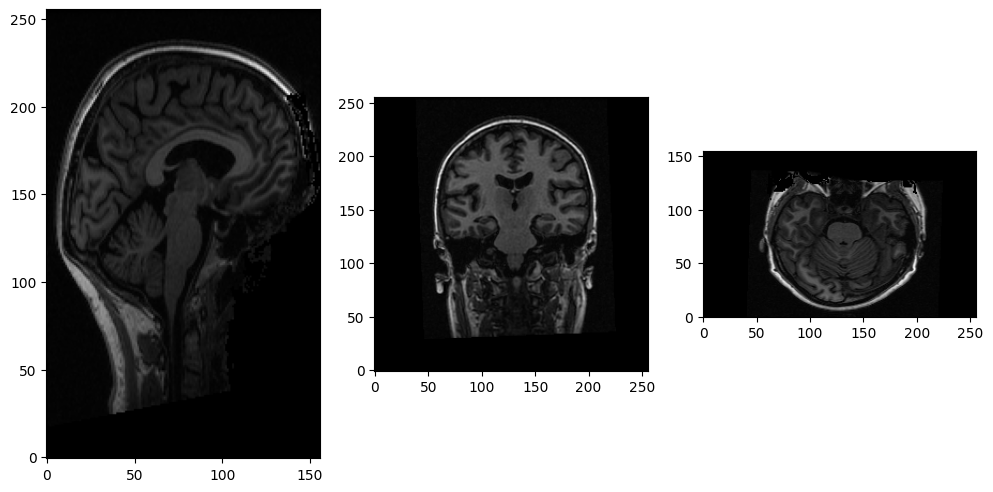

In [ ]:
slices = [yz_middle_slice, xz_middle_slice, xy_middle_slice]

# plot 2D images
fig, axes = plt.subplots(1, len(slices), figsize=(12, 6))
for i, slice in enumerate(slices):
    axes[i].imshow(slice.T, origin='lower')

#### The NiBabel **`orthoview()`** Method

The NiBabel **`orthoview()`** method allows to view 3D neuroimaging data in three orthogonal planes: sagittal, coronal, and axial.

It is useful for inspecting the orientation, voxel sizes, and spatial alignment of brain images.

<OrthoSlicer3D: ds114_sub009_highres.nii (256, 156, 256)>

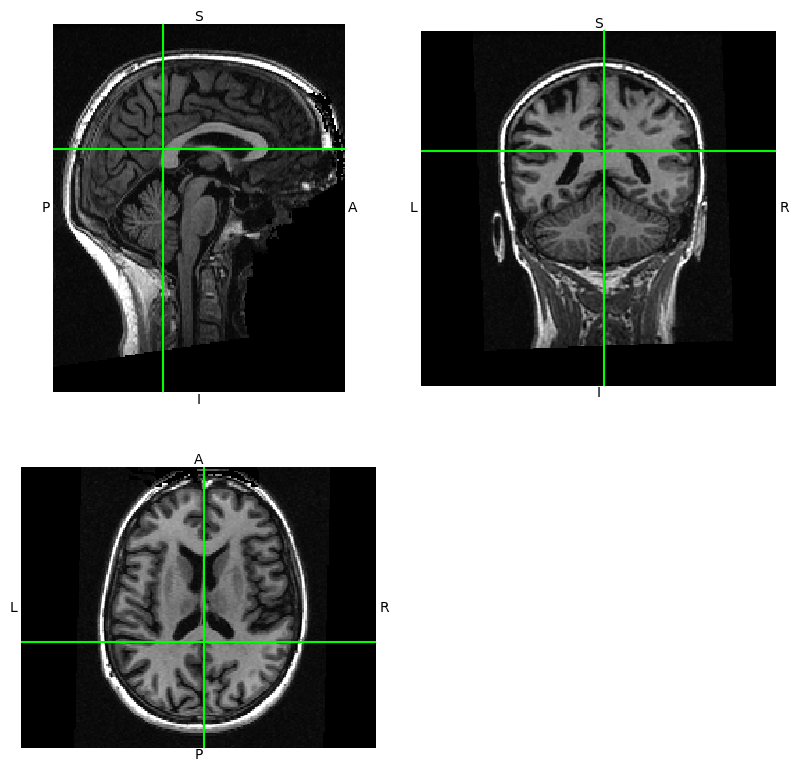

In [ ]:
# Visualize data in three orthogonal planes: sagittal, coronal, and axial
img.orthoview()

## The Affine

The affine is a 4 x 4 matrix represented as a 4 x 4 Numpy array.

It describes the transformation from the voxel space coordinates (indices [x, y, z]) to the reference space (distance in mm (R, A, S)).

The data we are dealing with refers to the reference space: (Right, Anterior, Superior).

The affine matrix is stored in the **`affine`** attribute of the NiBabel image object:

In [ ]:
# print the affine matrix
img.affine

array([[   1.  ,   -0.06,    0.01, -129.83],
       [   0.04,    1.26,    0.23, -119.09],
       [  -0.02,   -0.3 ,    0.97, -143.42],
       [   0.  ,    0.  ,    0.  ,    1.  ]])

### The Affine transformation

Let $(x,y,z)$ be a voxel space coordinates, and let $(u,v,w)$ be a reference space coordinates.

Let $M$ be a 3 by 3 a matrix representing a linear transformation from the voxel space into the reference space.

An affine transformation from the voxel space into the reference space is defined as follows:

$$\begin{split}\begin{bmatrix}
u\\
v\\
w\\
\end{bmatrix} = M
\begin{bmatrix}
x\\
y\\
z\\
\end{bmatrix} +
\begin{bmatrix}
a\\
b\\
c\\
\end{bmatrix}\end{split}$$

Let $m_{i,j}$ be the value in row $i$ and column $j$ of the matrix $M$.

Then the affine transformation can be represented by the matrix $A$ defined as follows:

$$\begin{split}A =
\begin{bmatrix}
m_{1,1} & m_{1,2} & m_{1,3} & a \\
m_{2,1} & m_{2,2} & m_{2,3} & b \\
m_{3,1} & m_{3,2} & m_{3,3} & c \\
0 & 0 & 0 & 1 \\
\end{bmatrix}\end{split}$$

The transformation from the space coordinates $(x,y,z)$ to the space coordinates $(u,v,w)$ is performed as follows:

$$\begin{split}\begin{bmatrix}
u\\
v\\
w\\
1\\
\end{bmatrix} = A
\begin{bmatrix}
x\\
y\\
z\\
1\\
\end{bmatrix}\end{split}$$

The inverse affine transformation is represented by the inverse of the matrix $A$, noted as $A^{-1}$, such that $I = A^{-1} A$, where $I$ is the identity matrix.

$$\begin{split}\begin{bmatrix}
x\\
y\\
z\\
1\\
\end{bmatrix} = A^{-1}
\begin{bmatrix}
u\\
v\\
w\\
1\\
\end{bmatrix}\end{split}$$

The **`numpy.linalg`** module provides functions for performing linear algebra operations, such as matrix multiplication.

The **`numpy.linalg.pinv()`** function computes the inverse of a matrix.

The **`numpy.dot()`** function in Python computes the dot product of two arrays.<br>

In the following example, we use the inverse of the affine to get the voxel that contains the origin of the image in the reference space:

In [ ]:
# compute the inverse of the affine matrix
affine_inverse = np.linalg.pinv(img.affine)

# compute the coordinates of the voxel that
# contains the origin of the image in the reference space
x, y, z, _ = affine_inverse.dot(np.array([0, 0, 0, 1])).astype(int)

print(f'Voxel coordinates of the origin of the image: ({x:2}, {y:2d}, {z:2d}) ')

Voxel coordinates of the origin of the image: (131, 58, 168) 


The NiBabel **`aff2axcodes()`** function returns the axis direction codes for an affine:




In [ ]:
# get the axis orientation
nib.aff2axcodes(img.affine)

('R', 'A', 'S')

The Nibabel **`voxel_sizes()`** function returns the voxel sizes:

In [ ]:
# get the voxel sizes
nib.affines.voxel_sizes(img.affine)

array([1. , 1.3, 1. ])

## Voxels and Time

In the following, we will work with a 4D fMRI neuroimaging data file containing volumetric time series data.

The Data stored in NIfTI file consists of 4D arrays (3D space + 1D time) where each voxel contains an intensity value representing the signal.

We will calculate the mean across all voxels at each timepoint.

### Download Data File

In [ ]:
!wget https://raw.githubusercontent.com/nipraxis/nipraxis-data/0.5/ds114_sub009_t2r1.nii

--2026-01-28 15:37:25--  https://raw.githubusercontent.com/nipraxis/nipraxis-data/0.5/ds114_sub009_t2r1.nii
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 42516832 (41M) [application/octet-stream]
Saving to: ‘ds114_sub009_t2r1.nii’

ds114_sub009_t2r1.n 100%[===================>]  40.55M   186MB/s    in 0.2s    

2026-01-28 15:37:25 (186 MB/s) - ‘ds114_sub009_t2r1.nii’ saved [42516832/42516832]



### Read Data File

In [ ]:
# create a NiBabel image object from a NIfTI file
img_4d = nib.load('ds114_sub009_t2r1.nii', mmap=False)

# print the image shape
print(img_4d.shape)

(64, 64, 30, 173)


### The Number of Voxels

A volume refers to a 3D image corresponding to a given timepoint.

We calculate the number of voxels in each volume:

In [ ]:
# calculate the number of voxels in each volume
n_voxels = np.prod(img_4d.shape[:-1])

print(n_voxels)

122880


### Get the Data

In [ ]:
# get the image data as a numpy.ndarray
data_4d = img_4d.get_fdata()

data_4d.shape

(64, 64, 30, 173)

### Calculate the Mean

We calculate the mean across voxels, for a single volume:



In [ ]:
# set the volume
first_vol = data_4d[..., 0]

# calculate the mean for a single volume
np.mean(first_vol)

np.float64(414.40107421875)

We calculate the mean across voxels for each volume and plot the values:
* we get the number of timepoints,
* we loop across all timepoints,
* we store the mean values in a list.

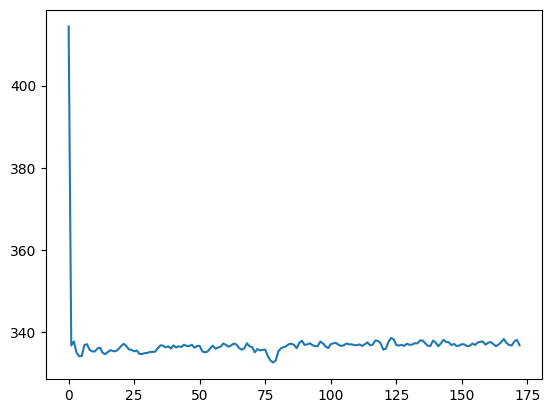

In [ ]:
# get the number of timepoints
timepoints = img_4d.shape[-1]

# list of means
means = []

# loop across all timepoints
for timepoint in range(timepoints):
    volume = data_4d[..., timepoint]
    means.append(np.mean(volume))

# plot the values in the means list
plt.plot(means)